<a href="https://colab.research.google.com/github/uomodellamansarda/DisneyMoviesAnalysis/blob/main/DisneyMovieAnalysisAndreaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. The dataset
<p>Walt Disney Studios is the foundation on which The Walt Disney Company was built. The Studios has produced more than 600 films since their debut film,  Snow White and the Seven Dwarfs in 1937. While many of its films were big hits, some of them were not. In this notebook, we will explore a dataset of Disney movies and analyze what contributes to the success of Disney movies.</p>
<p><img src="https://assets.datacamp.com/production/project_740/img/jorge-martinez-instagram-jmartinezz9-431078-unsplash_edited.jpg" alt></p>
<p>First, we will take a look at the Disney data compiled by <a href="https://data.world/kgarrett/disney-character-success-00-16">Kelly Garrett</a>. The data contains 579 Disney movies with six features: movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross. </p>
<p>Let's load the file and see what the data looks like.</p>

In [1]:
# Import pandas library
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
from sklearn.metrics import mean_squared_error
# Read the file into gross
url="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_movies_total_gross.csv"

gross = pd.read_csv(url)
gross['release_date'] = gross['release_date'].apply(pd.to_datetime)

# Print out gross
gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,1940-11-13,Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,1946-11-12,Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,1950-02-15,Drama,G,"$85,000,000","$920,608,730"


## 2. Top ten movies at the box office
<p>Let's started by exploring the data. We will check which are the 10 Disney movies that have earned the most at the box office. We can do this by sorting movies by their inflation-adjusted gross (we will call it adjusted gross from this point onward). </p>

In [2]:
# Sort data by the adjusted gross in descending order 
# ... YOUR CODE FOR TASK 2 ...
#removing the dollar sign from df1 colums
gross=gross.apply(lambda x: x.str.strip('$') if x.dtype == "object" else x)
#removing the comma from the numeric columns
gross=gross.apply(lambda x: x.replace(',',"",regex=True) if x.dtype == "object" else x)
#converting to numeric our columns (where it is possible)
gross=gross.apply(lambda x: pd.to_numeric(x,errors="ignore") if x.dtype == "object" else x)
gross=gross.sort_values(by="inflation_adjusted_gross",ascending=False)

# Display the top 10 movies 
# ... YOUR CODE FOR TASK 2 ...
gross.info()
gross.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   MPAA_rating               523 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 31.7+ KB


,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


## 3. Movie genre trend
<p>From the top 10 movies above, it seems that some genres are more popular than others. So, we will check which genres are growing stronger in popularity. To do this, we will group movies by genre and then by year to see the adjusted gross of each genre in each year.</p>

In [3]:
# Extract year from release_date and store it in a new column
gross['release_year'] = pd.DatetimeIndex(gross['release_date']).year

# Compute mean of adjusted gross per genre and per year
group = gross.groupby(['genre','release_year']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = group.reset_index()

# Inspect genre_yearly 
genre_yearly.head(10)
print(genre_yearly.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   genre                     218 non-null    object 
 1   release_year              218 non-null    int64  
 2   total_gross               218 non-null    float64
 3   inflation_adjusted_gross  218 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.9+ KB
None


In [4]:
#genre stats 
pd.set_option('display.float_format', str)
genre_mean = gross.groupby(['genre']).mean().round().sort_values(by=['inflation_adjusted_gross'],
                                                                 ascending=False)
genre_std = gross.groupby(['genre']).std().round().sort_values(by=['inflation_adjusted_gross'],
                                                               ascending=False)
print("Genre Numbers:",len(set(gross.genre)))
print(genre_mean.info())
print(genre_mean)
print(genre_std.info())
print(genre_std)


Genre Numbers: 13
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Musical to Documentary
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_gross               12 non-null     float64
 1   inflation_adjusted_gross  12 non-null     float64
 2   release_year              12 non-null     float64
dtypes: float64(3)
memory usage: 384.0+ bytes
None
                     total_gross  inflation_adjusted_gross  release_year
genre                                                                   
Musical               72330260.0               603597861.0        1984.0
Adventure            127047050.0               190397412.0        2001.0
Action               104614082.0               137473420.0        1999.0
Thriller/Suspense     58616938.0                89653790.0        2000.0
Comedy                44613295.0                84667730.0        1996.0
Romantic Comedy       50095950.0 

## 4. Visualize the genre popularity trend
<p>We will make a plot out of these means of groups to better see how box office revenues have changed over time.</p>

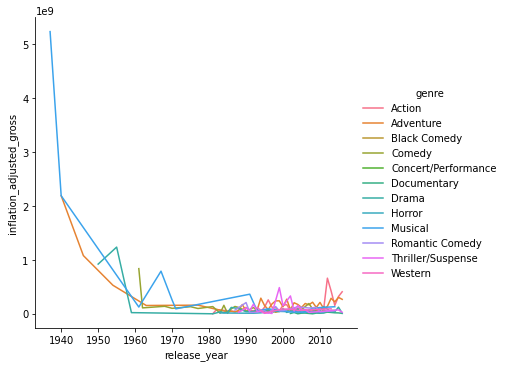

In [5]:
# Import seaborn library
# ... YOUR CODE FOR TASK 4 ...
import seaborn as sns
# Plot the data  
sns.relplot(data=genre_yearly,x='release_year',y='inflation_adjusted_gross',kind='line',hue='genre')
# ... YOUR CODE FOR TASK 4 ...

## 5. Data transformation
<p>The line plot supports our belief that some genres are growing faster in popularity than others. For Disney movies, Action and Adventure genres are growing the fastest. Next, we will build a linear regression model to understand the relationship between genre and box office gross. </p>
<p>Since linear regression requires numerical variables and the genre variable is a categorical variable, we'll use a technique called one-hot encoding to convert the categorical variables to numerical. This technique transforms each category value into a new column and assigns a 1 or 0 to the column. </p>
<p>For this dataset, there will be 11 dummy variables, one for each genre except the action genre which we will use as a baseline. For example, if a movie is an adventure movie, like The Lion King, the adventure variable will be 1 and other dummy variables will be 0. Since the action genre is our baseline, if a movie is an action movie, such as The Avengers, all dummy variables will be 0.</p>

In [6]:
# Convert genre variable to dummy variables 
genre_dummies = pd.get_dummies(gross['genre'],drop_first=True)

# Inspect genre_dummies
genre_dummies.head()
genre_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Adventure            579 non-null    uint8
 1   Black Comedy         579 non-null    uint8
 2   Comedy               579 non-null    uint8
 3   Concert/Performance  579 non-null    uint8
 4   Documentary          579 non-null    uint8
 5   Drama                579 non-null    uint8
 6   Horror               579 non-null    uint8
 7   Musical              579 non-null    uint8
 8   Romantic Comedy      579 non-null    uint8
 9   Thriller/Suspense    579 non-null    uint8
 10  Western              579 non-null    uint8
dtypes: uint8(11)
memory usage: 10.7 KB


## 6. The genre effect
<p>Now that we have dummy variables, we can build a linear regression model to predict the adjusted gross using these dummy variables.</p>
<p>From the regression model, we can check the effect of each genre by looking at its coefficient given in units of box office gross dollars. We will focus on the impact of action and adventure genres here. (Note that the intercept and the first coefficient values represent the effect of action and adventure genres respectively). We expect that movies like the Lion King or Star Wars would perform better for box office.</p>

In [7]:
# Import LinearRegression
# ... YOUR CODE FOR TASK 6 ...
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Build a linear regression model
regr = LinearRegression()

# Fit regr to the dataset
# ... YOUR CODE FOR TASK 6 ...
regr.fit(genre_dummies,gross['inflation_adjusted_gross'])
print(genre_dummies.size)
print(genre_dummies.shape)
action =  regr.intercept_
adventure = regr.coef_[[0]][0]
print()
print("Len Coefficent",len(regr.coef_))
# Inspect the estimated intercept and coefficient values 
print((action, adventure))


6369
(579, 11)

Len Coefficent 11
(102921757.36842026, 87475654.70909917)


In [27]:
#evaluating the results 
prediction=regr.predict(genre_dummies)
score=regr.score(genre_dummies,gross['inflation_adjusted_gross'])
print("Pearson Correlation Value is:\n",score.round(3))
reg_mean_squared_error=mean_squared_error(gross['inflation_adjusted_gross'],prediction)
print(np.vectorize("%.1f".__mod__)(reg_mean_squared_error))


Pearson Correlation Value is:
 0.109
72801697571099360.0


In [46]:
#we will fit 13 linear regression individually 
#one for each genre
#get results and make our assumptions
genre_list=list(set(gross['genre'].dropna()))
print(type(genre_list))
score_df=pd.DataFrame(genre_list,columns=['genre_list'])
score_df=score_df.assign(r2=np.zeros([len(genre_list),1]))
score_df=score_df.assign(MSE=np.zeros([len(genre_list),1]))
print(score_df)
for idx,x in enumerate(score_df['genre_list']): 
  
  y_vector=gross[gross['genre']==x]['inflation_adjusted_gross']
  x_vector=np.ones([len(y_vector),1])
  regr = LinearRegression()
  regr.fit(x_vector,y_vector)
  y_pred=regr.predict(x_vector)
  score_df.at[idx,'r2']=regr.score(x_vector,y_vector)
  #regr.score(genre_dummies,gross['inflation_adjusted_gross']
  score_df.at[idx,'MSE']=mean_squared_error(y_vector,y_pred).round()

<class 'list'>
             genre_list  r2  MSE
0               Western 0.0  0.0
1           Documentary 0.0  0.0
2   Concert/Performance 0.0  0.0
3                Comedy 0.0  0.0
4               Musical 0.0  0.0
5       Romantic Comedy 0.0  0.0
6     Thriller/Suspense 0.0  0.0
7                 Drama 0.0  0.0
8                Horror 0.0  0.0
9             Adventure 0.0  0.0
10         Black Comedy 0.0  0.0
11               Action 0.0  0.0


In [53]:
#comparing Andrea Ciufo estimator with the DataCamp tutor
print(score_df.info())
score_df=score_df.assign(dc_mse=reg_mean_squared_error)
score_df=score_df.assign(dc_mse_grt_mse=score_df['dc_mse']>score_df['MSE'])
print(score_df.sort_values(by=['MSE'],ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genre_list  12 non-null     object 
 1   r2          12 non-null     float64
 2   MSE         12 non-null     float64
 3   dc_mse      12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes
None
             genre_list  r2  ...                dc_mse  dc_mse_grt_mse
4               Musical 0.0  ... 7.280169757109936e+16           False
9             Adventure 0.0  ... 7.280169757109936e+16            True
7                 Drama 0.0  ... 7.280169757109936e+16            True
11               Action 0.0  ... 7.280169757109936e+16            True
3                Comedy 0.0  ... 7.280169757109936e+16            True
6     Thriller/Suspense 0.0  ... 7.280169757109936e+16            True
5       Romantic Comedy 0.0  ... 7.280169757109936e+16            True
0               Wester